https://plot.ly/python/reference/#layout-updatemenus

In [1]:
import ANEMO.ANEMO as A
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [3]:
x=np.arange(30)

T0,  t1,  t2,  tr = 0, 15, 12, 1
x_0, x1, x2, tau = 0, 2, 1, 13

fit = A.Equation.fct_saccade(x, x_0, tau, x1, x2, T0, t1, t2, tr,do_whitening=False)


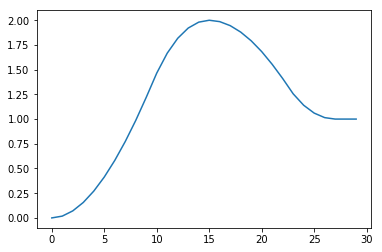

In [4]:
plt.plot(x, fit)

In [5]:
list_T0 = np.arange(-15, 10+1, 5)
list_t1 = np.arange(10, 20+1, 5)
list_t2 = np.arange(10, 20+1, 5)
list_tr = np.arange(0, 15+1, 5)

list_x_0 = np.arange(-0.1, 0.1+0.001, 0.05)
list_x1 = np.arange(-5, 5+1, 2)
list_x2 = np.arange(-5, 5+1, 2)
list_tau = np.arange(5, 40+1, 5)

In [6]:
param = dict(x=x,
             T0=T0, t1=t1, t2=t2, tr=tr,
             x_0=x_0, x1=x1, x2=x2,
             tau=tau)


def generat_data(do_whitening=False) :
    
    data = []
    
    for var, liste in zip(['T0', 't1', 't2', 'tr', 'x_0', 'x1', 'x2', 'tau'],
                          [list_T0, list_t1, list_t2, list_tr, list_x_0, list_x1, list_x2, list_tau]):
        
        for a in range(len(liste)) :
            new_param = param.copy()
            new_param[var] = liste[a]
            new_param['do_whitening']=do_whitening
            data.append(dict(visible=False, line=dict(color='black', width=1),
                             x=x, y=list(A.Equation.fct_saccade(**new_param))))
    
   
    return data

In [7]:
data_false = generat_data(do_whitening=False)
data_true = generat_data(do_whitening=True)

In [8]:
sliders=[]
d, t = 0, 0

for var, liste in zip(['T0', 't1', 't2', 'tr', 'x_0', 'x1', 'x2', 'tau'],
                          [list_T0, list_t1, list_t2, list_tr, list_x_0, list_x1, list_x2, list_tau]):
    
    dic = []
    for a in range(len(liste)) :
        di = dict(method = 'restyle', args = ['visible', [False] * len(data_false)],
                     label = str(liste[a]))
        di['args'][1][d] = True
        dic.append(di)
        d=d+1
    
    sliders.append(dict(x=-0.7, y=1.1, ticklen=0, font=dict(size=9),
                        active = len(liste),
                        currentvalue = {"prefix": "%s: "%var, 'font':{'size':13}, 'offset':5},
                        pad = {"t": t-30}, len=0.5, steps = dic))
    t=t+55


layout = go.Layout(title="Fonction Saccade", titlefont={'size':20},
                xaxis=dict(title='Time (ms)', range=[-10, 50], tickfont={'size':10}),
                yaxis=dict(title='Velocity (°/s)',range=[-10, 10], tickfont={'size':10}),
                sliders=sliders,  showlegend=False, font={'size':15})
                


data = data_false + data_true

vis = [False]+[True]+[False]*(len(data_false)-2)

updatemenus = list([
            dict(type = 'buttons',
                  direction = 'left', x = -0.5, y = 1.2,
                  active=-1, showactive = True,
                  xanchor = 'left', yanchor = 'bottom',
                  buttons=list([
                      dict(label = 'T/F', method = 'restyle',
                           args = [{'visible':vis+vis,
                                    'y': [data[i]['y'] for i in range(len(data))]}]),
                      dict(label = 'False', method = 'restyle',
                           args = [{'visible':vis,
                                    'y': [data_false[i]['y'] for i in range(len(data_false))]}]),
                      dict(label = 'True', method = 'restyle',
                           args=[{'visible':vis,
                                  'y': [data_true[i]['y'] for i in range(len(data_true))]}])]))
        ])


annotations = list([dict(text='do_whitening:', x=-0.7, y=1.2, yref='paper',xref='paper',
                         align='left', yanchor='bottom', showarrow=False, font={'size':15}) ])
layout['updatemenus'] = updatemenus
layout['annotations'] = annotations

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [10]:
plot(fig, filename='../docs/Fct_saccade.html', auto_open=False)

'file:///Users/laurentperrinet/pool/AME_is_AnalyseModelisationExperimentation_Chloe/ANEMO/docs/Fct_saccade.html'